In [122]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.font_manager
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go

In [123]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [125]:
shark_attack = pd.read_csv("/content/drive/MyDrive/RawData/attacks.csv", encoding='latin-1')
shark_attack.loc[0:,'Date':'Species ']

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# columns of my dataset
shark_attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [127]:
shark_attack.rename(columns={'Species ': 'Species'}, inplace=True)

In [128]:
species = shark_attack ['Species'].unique()
for s in species:
    print(s)

White shark
nan
2 m shark
Tiger shark, 3m
Tiger shark
Lemon shark, 3'
Bull shark, 6'
Grey reef shark
Invalid incident
Tawny nurse shark, 2m
Shark involvement not confirmed
Questionable
3 m shark
White shark, 3.5 m
White shark, 2.5 m
6' shark
Juvenile bull shark
Bull shark
Tiger shark, 12'
Wobbegong shark
3.5 m shark
1.8 m shark
Blacktip shark
Juvenile white shark,  2.7 to 3.2 m
Bull shark, 2 m
Possibly a wobbegong
Injury believed caused by an eel, not a shark
Galapagos shark?
2m shark
Bull shark, 3 m 
Grey reef shark. 2 m
small shark
Wobbegong shark?
Juvenile nurse shark
Nurse shark. 5'
Tiger shark, female
Some drowned but other may have been killed by blue sharks
White shark, 4.6 m
Cookiecutter shark
Wobbegong shark, 1 m
White shark, 4.5 m
Spinner shark, 4 to 5 feet
Tiger shark, 8 to 10 feet
8' shark
Death may have been due to drowning
5' shark
4' to 5' shark
Porbeagle, 1.5 m
White shark, 3.5m
5' to 6' shark
White shark, 3 to 3.5m 
Nurse shark
White shark, 3 m
Shark involvement questi

In [129]:
# Create a List of known shark species
list_of_species = ["White shark", "Tiger shark", "Lemon shark", "Bull shark", "Grey reef shark", "Tawny nurse shark", "Wobbegong shark", "Blacktip shark", "Galapagos shark", "Oceanic whitetip shark", "Cookiecutter shark", "Spinner shark", "Angel shark", "Dogfish shark", "Bronze whaler shark", "Reef shark", "Hammerhead shark", "Thresher shark", "Spurdog", "Lesser spotted dogfish", "Longfin mako shark", "Shortfin mako shark", "Goblin shark", "Soupfin shark", "Leopard shark", "Porbeagle", "Seven-gill shark", "Raggedtooth shark", "Sandtiger shark", "Cow shark", "Whitetip reef shark", "Salmon shark"]

In [130]:
# Remove rows whose "Species" is not in the list of shark species
shark_attack_species = shark_attack[shark_attack["Species"].isin(list_of_species)]

In [131]:
# Question 1: What are the most dangerous types of sharks to humans?
# Assuming the sharks with most attacks are the ones who are most dangerous to people.

# species that attack most
species_attack = shark_attack_species.groupby('Species')['Species'].count().sort_values(ascending=False)[1:10]

# Create a bar chart
data = go.Bar(x = species_attack.index,y=species_attack.values,text=species_attack.values, marker_color='pink')

layout = go.Layout(title = 'Shark attack by species',
                   xaxis=dict(title='Species'),
                   yaxis=dict(title='Number of attacks'),
                  )
fig = go.Figure(
    data=data,
    layout=layout
)
fig.show()

In [132]:
# Question 2: Are children more likely to be attacked by sharks?

# Unique values Age column
shark_attack['Age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [133]:
# Create a function to extract numeric values from a string
def extract_numeric_age(age_str):
    try:
        # Try to extract a numeric value from the string
        age = float(age_str)
        return age
    except ValueError:
        # If it fails, return NaN
        return np.nan

In [134]:
# Apply the function to the "Age" column and create "NumericAge"
shark_attack['NumericAge'] = shark_attack['Age'].apply(extract_numeric_age)
# Filter the rows in which numerical ages are present
shark_attack = shark_attack.dropna(subset=['NumericAge'])

In [135]:
# Unique values Age column
shark_attack['Age'].unique()

array(['57', '11', '48', '18', '52', '15', '12', '32', '10', '21', '34',
       '30', '60', '33', '29', '54', '41', '37', '56', '19', '25', '69',
       '38', '55', '35', '46', '45', '14', '28', '20', '24', '26', '49',
       '22', '7', '31', '17', '40', '13', '42', '3', '8', '50', '16',
       '82', '73', '68', '51', '39', '58', '47', '61', '65', '36', '66',
       '43', '9', '72', '59', '6', '27', '64', '23', '71', '44', '62',
       '63', '70', '53', '77', '74', '5', '86', '84', '75', ' 30', ' 28',
       '87', '67', '74 ', '45 ', '20 ', '1', ' 43', '81', '78'],
      dtype=object)

In [136]:
# To answer the question, a column has been added to distinguish between shark attacks on children (in this case under 18 years old) and adults (18 years and older).
# Adding column Child

shark_attack['Child'] = shark_attack['Age'] < '18'

# For visualization purposes, adjust the position of the column 'Child'
shark_attack.insert(11, 'Child', shark_attack.pop('Child'))
shark_attack.loc[0:,'Date':'Child']

<ipython-input-136-e7bec33a908b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Child
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,False
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,True
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,False
6,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,False
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,False
...,...,...,...,...,...,...,...,...,...,...,...
6242,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,6,False
6243,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,16,True
6254,Before 1957,0.0,Provoked,CUBA,Havana Province,Cojimar,"Shark fishing, knocked overboard",Sandrillio,M,50,False
6276,Early 1930s,0.0,Unprovoked,BELIZE,NaN,NaN,Standing,a servant,M,16,True


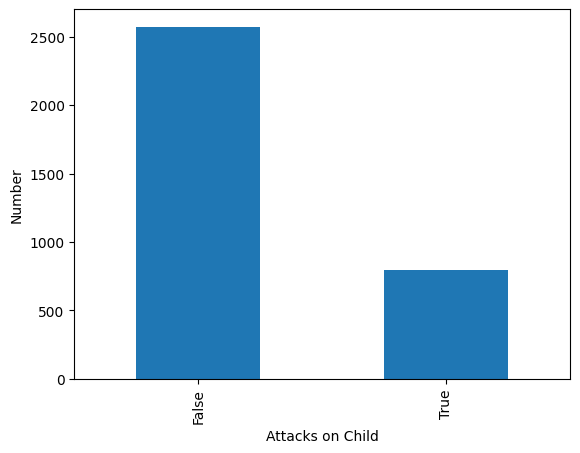

In [137]:
# Ultimately, the graph shows that the number of attacks on children is much lower than the number of attacks on people aged 18 and over.

# Create a bar chart of the 'Child' column
attack_on_children = shark_attack['Child'].value_counts()
attack_on_children.plot(kind='bar')

# Labels graph
plt.xlabel('Attacks on Child')
plt.ylabel('Number')
plt.xticks([0, 1], ['False', 'True'])

plt.show()

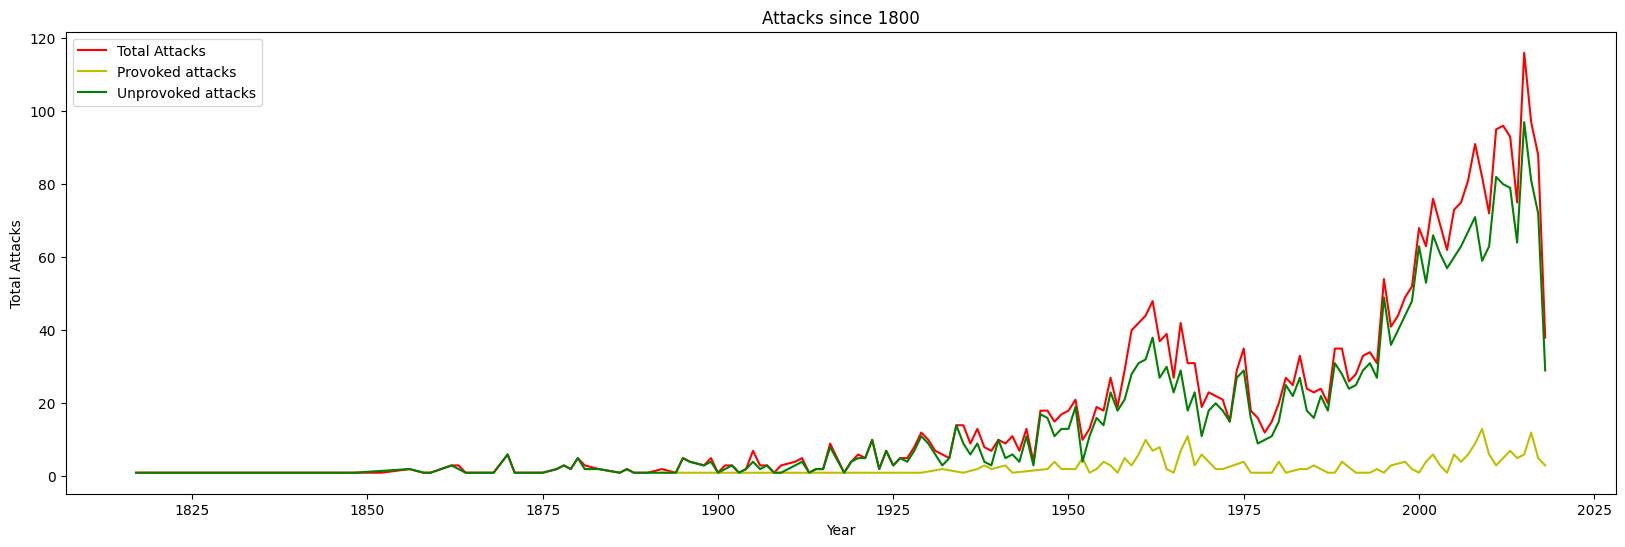

In [138]:
# Question 3: Are shark attacks where sharks were provoked more or less dangerous?
# I want to see a total number of attacks in my line graph and add the numbers of provoked attacks and unprovoked attacks to see a clear difference.
# In the graph you can see a big difference between unprovoced attacks and provoced attacks.
# Given the large difference between provoked and unprovoked attacks, I would assume that even if you don't provoke an attack, you still have a high chance of being attacked by a shark.
# Not to mention the fact that I wouldn't provoke a shark to attack anyway.

# To make the graph easier to read, only data from 1800 onwards is shown. Few attacks took place before this.
shark_attack = shark_attack[shark_attack['Year'] >= 1800]

# Calculate the number of attacks per year
year = shark_attack['Year'].value_counts().sort_index()

# Calculate the number of 'Provoked' attacks per year
provoked_attacks = shark_attack[shark_attack['Type'] == 'Provoked']['Year'].value_counts().sort_index()

# Calculate the number of 'Unprovoked' attacks per year
unprovoked_attacks = shark_attack[shark_attack['Type'] == 'Unprovoked']['Year'].value_counts().sort_index()

# Make a line graph
plt.figure(figsize=(20, 6))

plt.plot(year.index, year.values, 'r-', label='Total Attacks')
plt.plot(provoked_attacks.index, provoked_attacks.values, 'y-', label='Provoked attacks')
plt.plot(unprovoked_attacks.index, unprovoked_attacks.values, 'g-', label='Unprovoked attacks')

plt.xlabel('Year')
plt.ylabel('Total Attacks')
plt.title('Attacks since 1800')

plt.legend()

plt.show()

In [139]:
# Unique values Activity column
shark_attack['Activity'].unique()

array(['Paddling', 'Standing', 'Surfing', 'Swimming', 'Fishing',
       'Walking', 'Feeding sharks', 'Boogie boarding', 'Scuba diving',
       'Paddle-skiing', 'Body boarding', 'Stand-Up Paddleboarding',
       'Wading', 'Scuba Diving', 'Kayak fishing for sharks',
       'Cleaning fish', 'Snorkeling', 'Spearfishing', nan, 'Free diving',
       'Fishing / Wading', 'Night bathing', 'Surfing ',
       'Kayaking / Fishing', 'Body surfing', 'SUP', 'Skimboarding',
       'Kayaking', 'Touching a shark', 'Fishing ',
       'Attempting to lasso a shark', 'Paddle boarding', 'Kakaying',
       'Washing hands', 'Surf skiing ', 'Surf fishing', 'Floating',
       'Surfng', 'Kite surfing', 'SUP Foil boarding', 'Lobstering',
       'Floating in tube', 'Diving', 'Teasing a shark',
       'Diving for beche-de-mer', 'Feeding stingrays?', 'Windsurfing',
       'Sea disaster', 'Lobster fishing', 'Swimming / Wading',
       'Fishing for shrimp', 'Photographing fish', 'Kayak Fishing',
       'Surf-skiing', '

In [140]:
# Question 4: Are certain activities more likely to result in a shark attack?

# To gain a clear insight, i've made a top 10 of all the provoced attacks with the associated activity
attack_activity = shark_attack[shark_attack.Type == 'Provoked'].groupby('Activity')['Activity'].count().sort_values(ascending=False)[:10]
attack_activity

Activity
Fishing               73
Spearfishing          32
Surfing               10
Scuba diving           6
Wading                 6
Swimming               6
Diving                 4
Shark fishing          4
Fishing for sharks     4
Snorkeling             3
Name: Activity, dtype: int64

In [141]:
# From the top 10 the activities that are essentially the same can be grouped
shark_attack['Activity'] = shark_attack['Activity'].str.replace('.*Fishing.*', 'Fishing', case=False, regex=True)
shark_attack['Activity'] = shark_attack['Activity'].str.replace('.*Diving.*', 'Diving', case=False, regex=True)
shark_attack['Activity'].unique()

array(['Paddling', 'Standing', 'Surfing', 'Swimming', 'Fishing',
       'Walking', 'Feeding sharks', 'Boogie boarding', 'Diving',
       'Paddle-skiing', 'Body boarding', 'Stand-Up Paddleboarding',
       'Wading', 'Cleaning fish', 'Snorkeling', nan, 'Night bathing',
       'Surfing ', 'Body surfing', 'SUP', 'Skimboarding', 'Kayaking',
       'Touching a shark', 'Attempting to lasso a shark',
       'Paddle boarding', 'Kakaying', 'Washing hands', 'Surf skiing ',
       'Floating', 'Surfng', 'Kite surfing', 'SUP Foil boarding',
       'Lobstering', 'Floating in tube', 'Teasing a shark',
       'Feeding stingrays?', 'Windsurfing', 'Sea disaster',
       'Swimming / Wading', 'Photographing fish', 'Surf-skiing',
       'Treading water', 'Body boarding ', 'Playing in the water',
       'Body Boarding', 'Body surfing?', 'Playing',
       'Attempting to rescue a shark', 'Photographing the shark',
       'Standing / Snorkeling', 'Hand feeding sharks', 'Rowing',
       'Filming', 'Swimming afte

In [142]:
# Again a top 10 of all the provoced attacks with the associated activity
attack_activity = shark_attack[shark_attack.Type == 'Provoked'].groupby('Activity')['Activity'].count().sort_values(ascending=False)[:10]
attack_activity

Activity
Fishing                                                                                         145
Diving                                                                                           27
Surfing                                                                                          10
Swimming                                                                                          6
Wading                                                                                            6
Snorkeling                                                                                        3
Teasing a shark                                                                                   2
Feeding sharks                                                                                    2
Moving shark from tuna vessel when boat rolled, placing both man & shark in chest-deep water      1
On expedition filming a feature movie & standing on tripod                                 

In [143]:
#  I want to refrase the output for the last 2 in my top 10
shark_attack['Activity'] = shark_attack['Activity'].replace({"Moving shark from tuna vessel when boat rolled, placing both man & shark in chest-deep water": "Moving a shark",
                                         "On expedition filming a feature movie & standing on tripod": "Filming a shark"})

In [144]:
# Again a top 10 of all the provoced attacks with the associated activity
attack_activity = shark_attack[shark_attack.Type == 'Provoked'].groupby('Activity')['Activity'].count().sort_values(ascending=False)[:10]
attack_activity

Activity
Fishing             145
Diving               27
Surfing              10
Swimming              6
Wading                6
Snorkeling            3
Teasing a shark       2
Feeding sharks        2
Measuring sharks      1
Moving a shark        1
Name: Activity, dtype: int64

In [145]:
# Create a bar chart to show activities that may pose the greatest risk of being attacked by a shark
fig = px.bar(attack_activity, x=attack_activity.values, y=attack_activity.index, orientation='h', labels={'index':'','x':'Attack Count'},
            title = 'Which activity creates the greatest risk of shark attack')
fig.update_layout(height=500, width=1000)
fig.show()